### MS 263 In-class problems: Feb. 27 2018

#### 1. Uncertainty in surface ocean CO$_2$ calculations

The equation for computing CO$_2$ concentrations from measurements of dissolved inorganic carbon (DIC) and pH is given by

$$ [CO_2]=  \frac{[𝐷𝐼𝐶]}{\left(1+ \frac{𝐾_1^′}{[𝐻^+]}+\frac{𝐾_1^′𝐾_2^′}{[𝐻^+]^2}\right)} $$

where the dissociation constants that govern the dissociation of CO$_2$ into carbonate and bicarbonate are known from laboratory measurements and are given on a logarithmic scale as $pK'_1 = -\log{K'_1} = $ 5.847 and $pK'_1 = -\log{K'_2} = $ 8.966.

The fugacity (partial pressure, not accounting for non-ideal gas effects) of CO$_2$ can be calculated using

$$ fCO_2 = \frac{[CO_2]}{K_H}$$

where $K_{H,CO_2}$ =  3.24x10$^{-2}$ mol/(kg atm) is Henry's Law constant.

Measurements of DIC have an analytical uncertainty of +/-2 $\mu$mol/kg. Measurements of pH have an analytical uncertainty of +/- 0.0020.

Typical surface values are [DIC] $\approx$ 2000 $\mu$mol/kg and pH $\approx$ 8.1. What is the uncertainty in $fCO_2$ calculated from these values?

In [1]:
from uncertainties import ufloat


#### 2. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

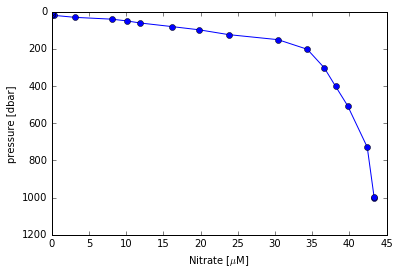

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = '../week03_wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')

#### 3. Harmonic analysis

Fit an annual cycle to a two-year time series of monthly SST data (source: Emery and Thomson).

* Write out the problem as a system of equations, and in matrix form.
* Create a design matrix A - start with a matrix of NaNs, then fill in the columns.
* Use `np.linalg.lstsq` to solve for the coefficients.
* Plot the modeled fit on top of the data.

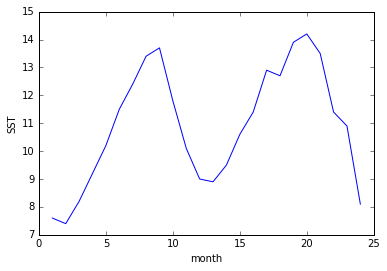

In [78]:
t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])
plt.plot(t,SST)
plt.xlabel('month')
plt.ylabel('SST')